# CDU: Speed Ratio 

# Libraries and Data

### Libraries

In [1]:
import pandas as pd
from google.cloud import bigquery
from google.cloud import storage
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import scipy.stats as stats
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from prettytable import PrettyTable
from scipy.stats import percentileofscore
from google.auth import default
from google.cloud import bigquery

warnings.filterwarnings('ignore')

### Loading data from the table on GCP

##### BigQuery Connection

In [2]:
creds, project = default()
creds = creds.with_quota_project(project)

bqclient = bigquery.Client(credentials=creds, project=project)
bqclient = bigquery.Client()

##### Interested BCB

In [3]:
%%bigquery df
SELECT *
FROM `irn-74856-zlb-lab-c5.labs_victor_de_carvalho_silva.deamCcs2SpeedRangeAndAccelRatio_2`;

Query is running:   0%|          |

Downloading:   0%|          |

In [4]:
df.head()

,Code_001_MODEL,vin_hashed,maxEndTot,totalMileage,totalDurationHours,totalCustomerDuration,averageSpeed,avgWeightedPositiveLongAccelMs2,ratiodurationRawSpeedRange0,ratiodurationRawSpeedRangeBetween0And5,ratiodurationRawSpeedRangeBetween5And30,ratiodurationRawSpeedRangeBetween30And50,ratiodurationRawSpeedRangeBetween50And60,ratiodurationRawSpeedRangeBetween60And70,ratiodurationRawSpeedRangeBetween70And90,ratiodurationRawSpeedRangeBetween90And100,ratiodurationRawSpeedRangeBetween100And120,ratiodurationRawSpeedRangeSup120
0,BCB,-305932143,16423.210938,11906.000000,268.0,405,44.346498,0.732955,0.114490,0.009945,0.165925,0.267728,0.148773,0.113329,0.121377,0.021256,0.021101,0.016075
1,BCB,-1264307953,22123.410156,14641.188477,427.0,431,34.228111,0.709544,0.143308,0.021831,0.296890,0.270171,0.101970,0.062833,0.065435,0.013012,0.024524,0.000027
2,BCB,2143983900,26242.080078,22304.829834,830.0,449,26.868712,0.708493,0.251070,0.025306,0.269562,0.297081,0.077879,0.034563,0.022206,0.005736,0.010186,0.006412
3,BCB,-346498125,22381.060547,17288.730087,425.0,621,40.668281,0.702588,0.110629,0.026898,0.294633,0.273256,0.049514,0.035089,0.082571,0.038263,0.088961,0.000184
4,BCB,565691450,30812.490234,17958.250000,390.0,451,45.930203,0.690873,0.079055,0.012768,0.229283,0.320066,0.099652,0.066289,0.069825,0.021556,0.051394,0.050112


# Data Analysis

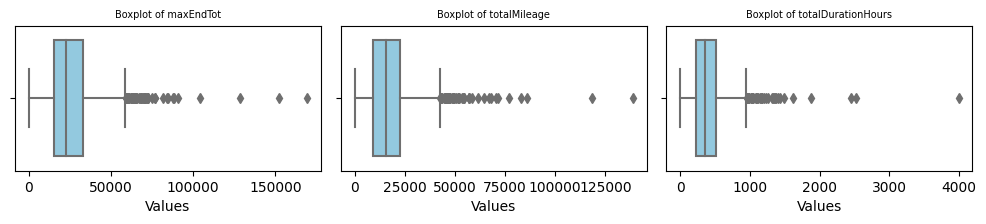

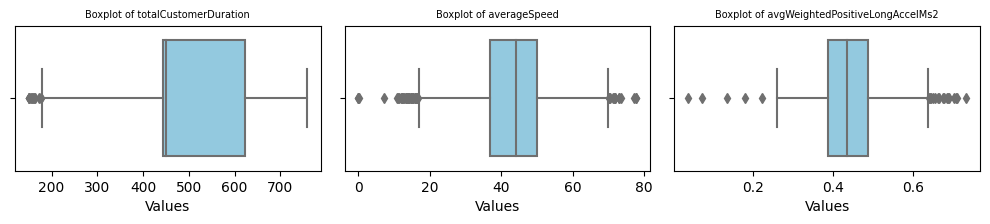

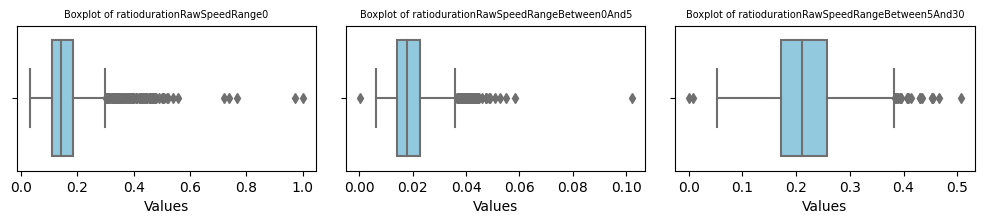

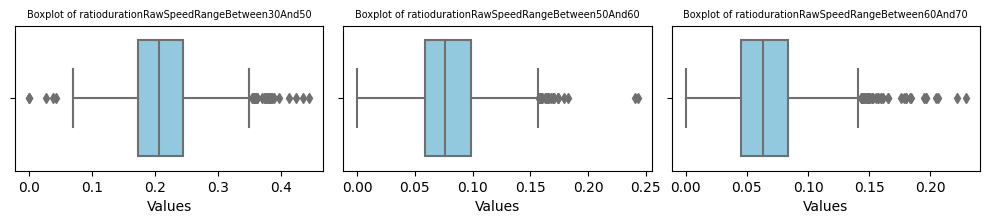

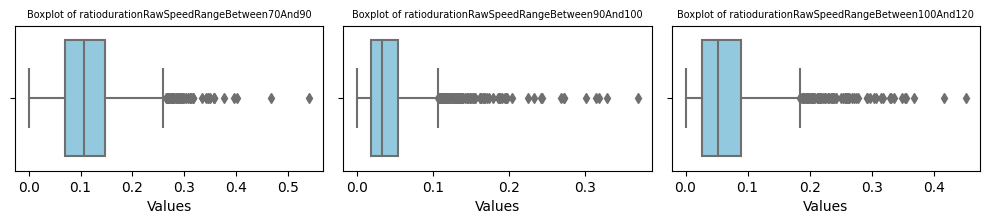

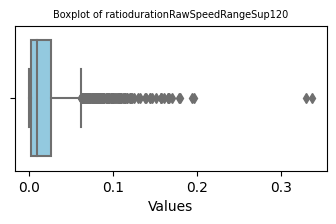

In [5]:
# Get all columns except the first 2
cols = df.columns[2:]

# Split the columns into sublists of 3
cols_split = [cols[i:i+3] for i in range(0, len(cols), 3)]

# Loop over the sublists
for subcols in cols_split:
    # Create a new figure
    plt.figure(figsize=(10, 8))

    # Loop over each column in the sublist
    for i, col in enumerate(subcols, 1):
        # Add a subplot in a 4x3 grid
        plt.subplot(4, 3, i)

        # Plot the boxplot of the current column
        sns.boxplot(x=df[col], color='skyblue')

        # Add a title with a smaller font size
        plt.title(f'Boxplot of {col}', fontsize=7)

        # Add a label to the x-axis
        plt.xlabel('Values')

    # Adjust the layout to avoid subplot overlap
    plt.tight_layout()
    
    # Display the figure
    plt.show()


In [6]:
# Get all columns except the first 2
cols = df.columns[2:]

# Describe only these columns
description = df[cols].describe().T  # Transpose for better readability

# Initialize PrettyTable
table = PrettyTable()
table.field_names = ["Column", "Count", "Mean", "Std Dev", "Min", "25%", "50%", "75%", "Max"]

# Add rows to the table
for col in description.index:
    count = description.loc[col, 'count']
    mean = description.loc[col, 'mean']
    std_dev = description.loc[col, 'std']
    min_val = description.loc[col, 'min']
    q25 = description.loc[col, '25%']
    median = description.loc[col, '50%']
    q75 = description.loc[col, '75%']
    max_val = description.loc[col, 'max']
    
    table.add_row([col, f"{count:.0f}", f"{mean:.2f}", f"{std_dev:.2f}", f"{min_val:.2f}", f"{q25:.2f}", f"{median:.2f}", f"{q75:.2f}", f"{max_val:.2f}"])

# Print the table
print(table)


+--------------------------------------------+-------+----------+----------+--------+----------+----------+----------+-----------+
|                   Column                   | Count |   Mean   | Std Dev  |  Min   |   25%    |   50%    |   75%    |    Max    |
+--------------------------------------------+-------+----------+----------+--------+----------+----------+----------+-----------+
|                 maxEndTot                  |  1786 | 25504.12 | 14841.97 |  5.33  | 15619.58 | 22888.46 | 32917.52 | 169261.59 |
|                totalMileage                |  1786 | 17250.96 | 11860.69 |  0.00  | 9391.40  | 15417.53 | 22709.08 | 138611.30 |
|             totalDurationHours             |  1786 |  389.79  |  252.30  |  0.00  |  227.00  |  356.00  |  513.00  |  3992.00  |
|           totalCustomerDuration            |  1786 |  493.32  |  112.77  | 150.00 |  444.25  |  450.00  |  622.00  |   758.00  |
|                averageSpeed                |  1786 |  43.37   |  11.00   |  0.00 

# Confidence Interval

### Confidence Interval on all public

##### Confidence Interval for the Mean + Normal Approximation (Formula)

The code calculates the confidence interval for the mean of a sample using the formula for the confidence interval of the mean based on the normal approximation. Here’s a step-by-step breakdown of how the confidence interval is calculated

In [7]:
def normal_approximation_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_error = np.std(data, ddof=1) / np.sqrt(n)  # Use ddof=1 for sample standard deviation
    z_score = norm.ppf((1 + confidence) / 2)
    margin_of_error = z_score * std_error
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# Exclude the first two columns
df = df.iloc[:, 2:]

# Convert all columns to numeric, coercing errors to NaN, and drop rows with NaNs
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Create a table with PrettyTable
table = PrettyTable()
table.field_names = ["Column", "Mean", "Confidence Interval"]

# Calculate and print confidence intervals for each column
for col in df.columns:
    lower_bound, upper_bound = normal_approximation_confidence_interval(df[col])
    col_mean = df[col].mean()
    table.add_row([col, f"{col_mean:.3f}", f"[{lower_bound:.3f}, {upper_bound:.3f}]"])

# Print the table
print(table)


+--------------------------------------------+-----------+------------------------+
|                   Column                   |    Mean   |  Confidence Interval   |
+--------------------------------------------+-----------+------------------------+
|                 maxEndTot                  | 25504.116 | [24815.782, 26192.449] |
|                totalMileage                | 17250.960 | [16700.891, 17801.029] |
|             totalDurationHours             |  389.792  |   [378.091, 401.493]   |
|           totalCustomerDuration            |  493.316  |   [488.086, 498.546]   |
|                averageSpeed                |   43.369  |    [42.859, 43.879]    |
|      avgWeightedPositiveLongAccelMs2       |   0.441   |     [0.437, 0.444]     |
|        ratiodurationRawSpeedRange0         |   0.162   |     [0.158, 0.166]     |
|   ratiodurationRawSpeedRangeBetween0And5   |   0.019   |     [0.019, 0.020]     |
|  ratiodurationRawSpeedRangeBetween5And30   |   0.218   |     [0.215, 0.221

##### Boostrap

In [8]:
def bootstrap_confidence_interval(data, num_resamples=1000, confidence=0.95):
    # Compute the original sample mean
    original_mean = np.mean(data)
    
    # Initialize array to store means of resamples
    resample_means = np.empty(num_resamples)
    
    # Perform bootstrap resampling
    for i in range(num_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)
        resample_means[i] = np.mean(resample)
    
    # Compute the lower and upper percentiles for the confidence interval
    lower_bound = np.percentile(resample_means, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(resample_means, (1 + confidence) / 2 * 100)
    
    return lower_bound, upper_bound

# Convert all columns to numeric, coercing errors to NaN, and drop rows with NaNs
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Create a table with PrettyTable
table = PrettyTable()
table.field_names = ["Column", "Mean", "Confidence Interval"]

# Calculate and print confidence intervals for each column
for col in df.columns:
    lower_bound, upper_bound = bootstrap_confidence_interval(df[col])
    col_mean = df[col].mean()
    table.add_row([col, f"{col_mean:.3f}", f"[{lower_bound:.3f}, {upper_bound:.3f}]"])

# Print the table
print(table)


+--------------------------------------------+-----------+------------------------+
|                   Column                   |    Mean   |  Confidence Interval   |
+--------------------------------------------+-----------+------------------------+
|                 maxEndTot                  | 25504.116 | [24847.652, 26218.251] |
|                totalMileage                | 17250.960 | [16723.315, 17772.792] |
|             totalDurationHours             |  389.792  |   [378.632, 401.369]   |
|           totalCustomerDuration            |  493.316  |   [488.261, 498.860]   |
|                averageSpeed                |   43.369  |    [42.842, 43.839]    |
|      avgWeightedPositiveLongAccelMs2       |   0.441   |     [0.437, 0.444]     |
|        ratiodurationRawSpeedRange0         |   0.162   |     [0.158, 0.166]     |
|   ratiodurationRawSpeedRangeBetween0And5   |   0.019   |     [0.019, 0.020]     |
|  ratiodurationRawSpeedRangeBetween5And30   |   0.218   |     [0.215, 0.221

Using the library created

In [14]:
from confidence_intervals_v2 import plot_confidence_intervals

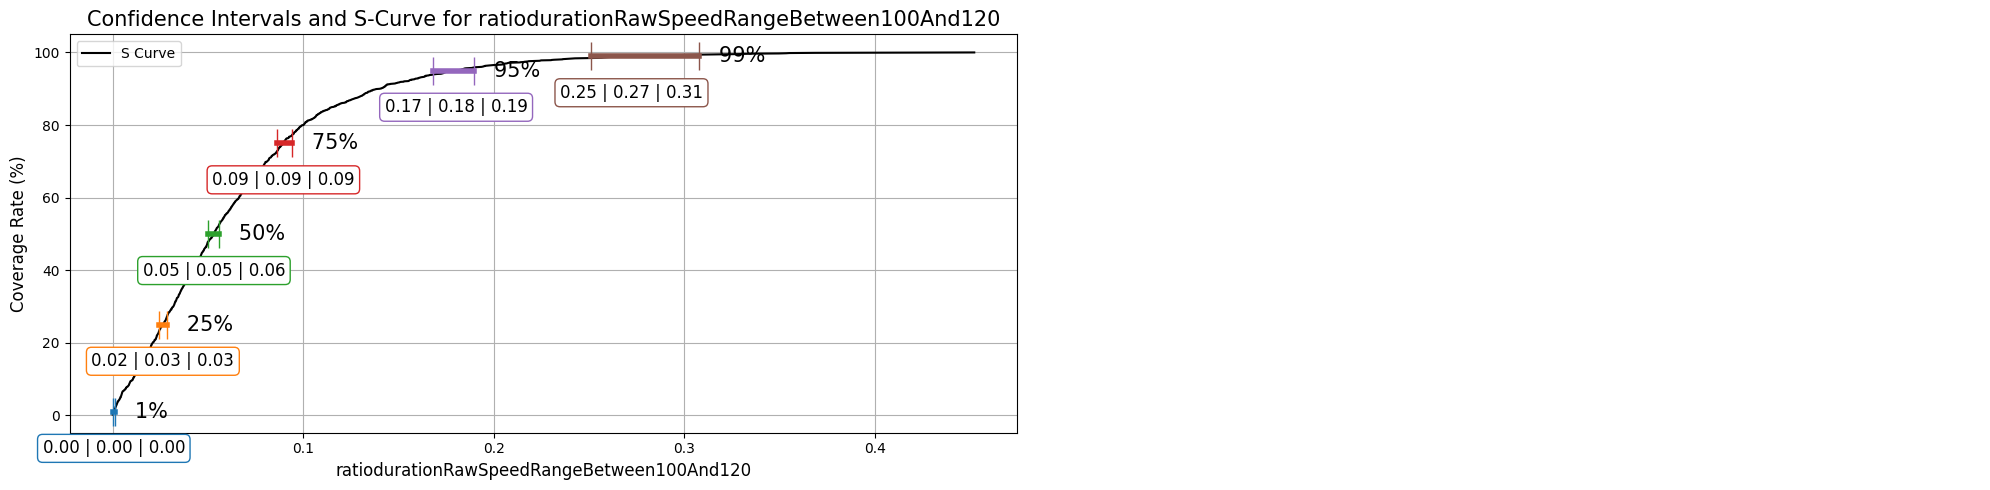

In [15]:
plot_confidence_intervals(df, column='ratiodurationRawSpeedRangeBetween100And120', percentiles=[1, 25, 50, 75, 95, 99])

### Confidence Interval on the percentiles

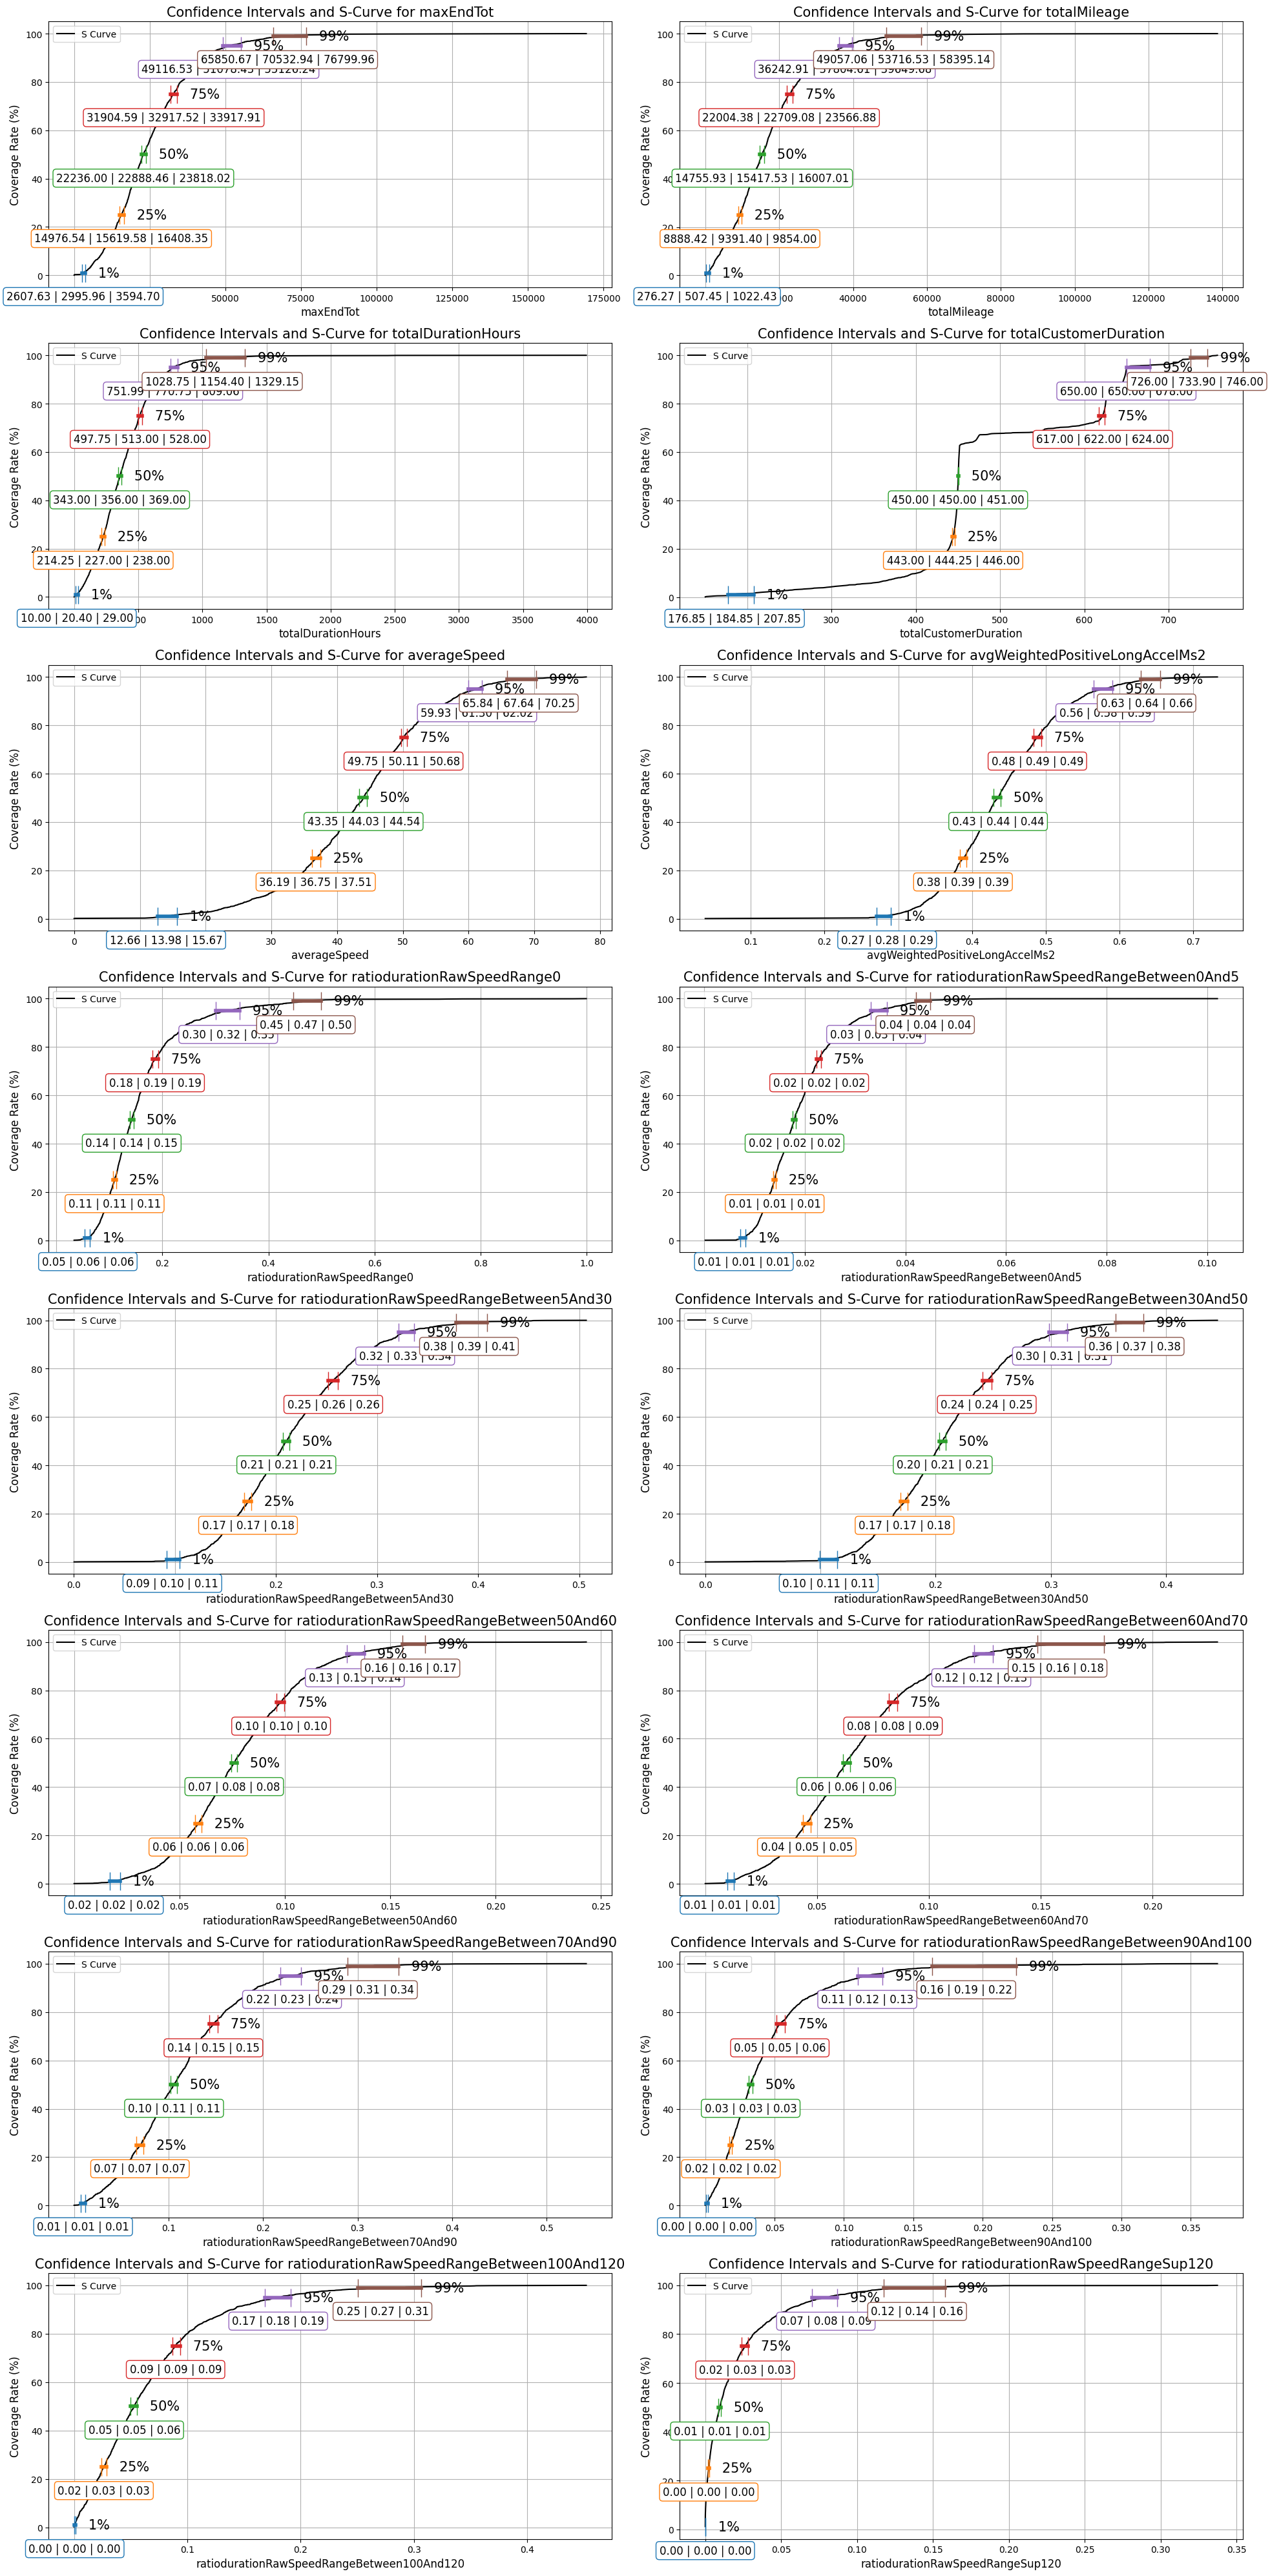

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

# Simplified functions
def calculate_cdf(data):
    sorted_data = np.sort(data)
    return sorted_data, [percentileofscore(sorted_data, value) for value in sorted_data]

def bootstrap_confidence_interval(data, percentiles=(1, 25, 50, 75, 95, 99), confidence=0.95, n_bootstraps=1000):
    bootstraps = [np.percentile(np.random.choice(data, size=len(data), replace=True), percentiles) for _ in range(n_bootstraps)]
    return {p: (np.percentile(bootstraps, (1-confidence)/2*100, axis=0)[i], 
                np.percentile(bootstraps, (1+confidence)/2*100, axis=0)[i]) for i, p in enumerate(percentiles)}

def plot_confidence_intervals(df, column=None, percentiles=[1, 25, 50, 75, 95, 99], confidence=0.95, n_bootstraps=1000):
    if column:
        # Plot for a single column
        columns = [column]
    else:
        # Plot for all columns
        columns = df.columns
    
    n_cols = 2
    n_rows = (len(columns) + n_cols - 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axs = axs.flatten()

    for i, col in enumerate(columns):
        data = df[col].dropna()  # Ensure data does not have NaN values
        sorted_data, cdf = calculate_cdf(data)
        intervals = bootstrap_confidence_interval(data, percentiles, confidence, n_bootstraps)
        ax = axs[i]
        
        # S-curve plot
        ax.plot(sorted_data, cdf, color='k', label='S Curve')
        
        # Confidence intervals and percentiles
        for j, p in enumerate(percentiles):
            interval = intervals[p]
            percentile_value = np.percentile(data, p)
            ax.plot(interval, [p, p], '|-', markersize=20, color=f'C{j}', linewidth=4)
            ax.text(interval[1], p, f'   {p}% ', fontsize=15, verticalalignment='center')
            ax.annotate(f'{interval[0]:.2f} | {percentile_value:.2f} | {interval[1]:.2f}', 
                        (percentile_value, p), textcoords="offset points", xytext=(0, -30), ha='center', 
                        fontsize=12, bbox=dict(boxstyle="round,pad=0.3", edgecolor=f'C{j}', facecolor="white"))

        # Axis limits, labels, and titles
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel('Coverage Rate (%)', fontsize=12)
        ax.set_title(f'Confidence Intervals and S-Curve for {col}', fontsize=15)
        ax.legend(loc='best', fontsize=10)
        ax.grid(True)
        ax.tick_params(axis='both', labelsize=10)

    # Turn off unused subplots
    for i in range(len(columns), len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

# Plot for a single column
plot_confidence_intervals(df, percentiles=[1, 25, 50, 75, 95, 99])


Selecting the worst case:

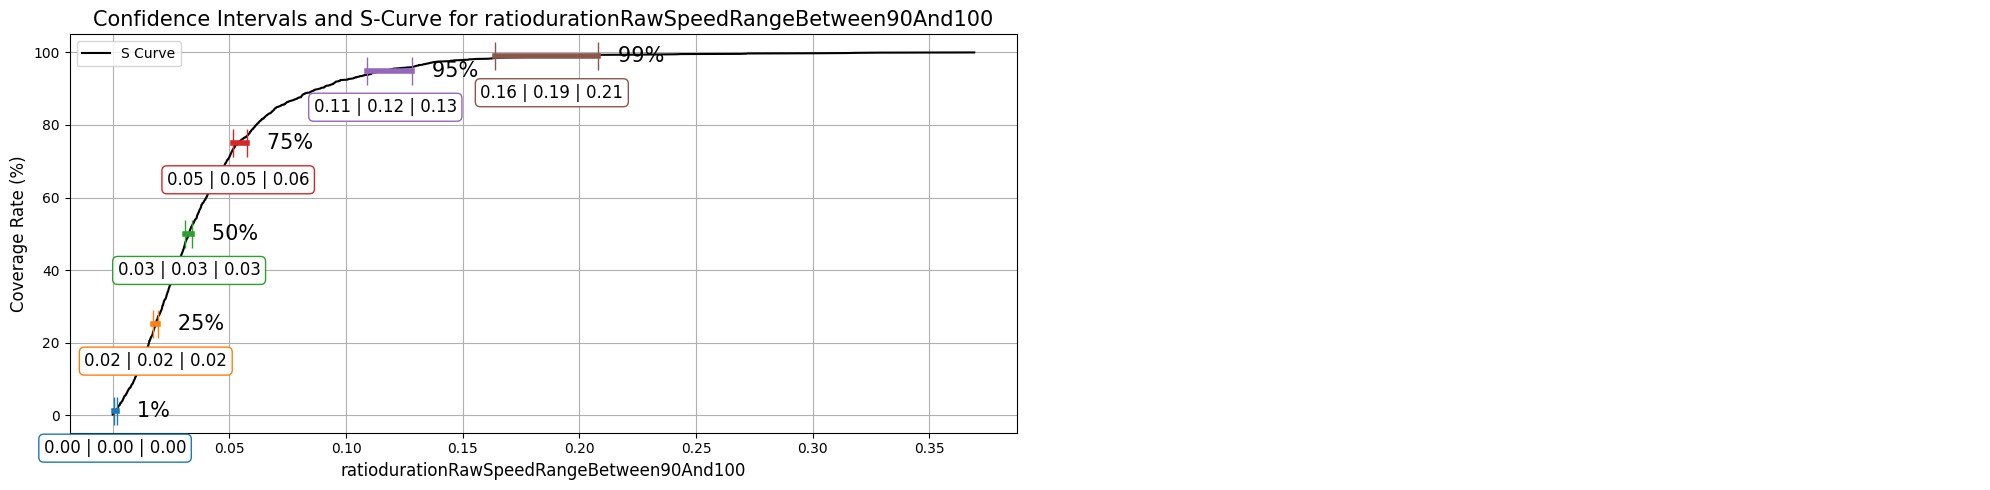

In [31]:
# Plot for a single column
plot_confidence_intervals(df, 'ratiodurationRawSpeedRangeBetween90And100', percentiles=[1, 25, 50, 75, 95, 99])

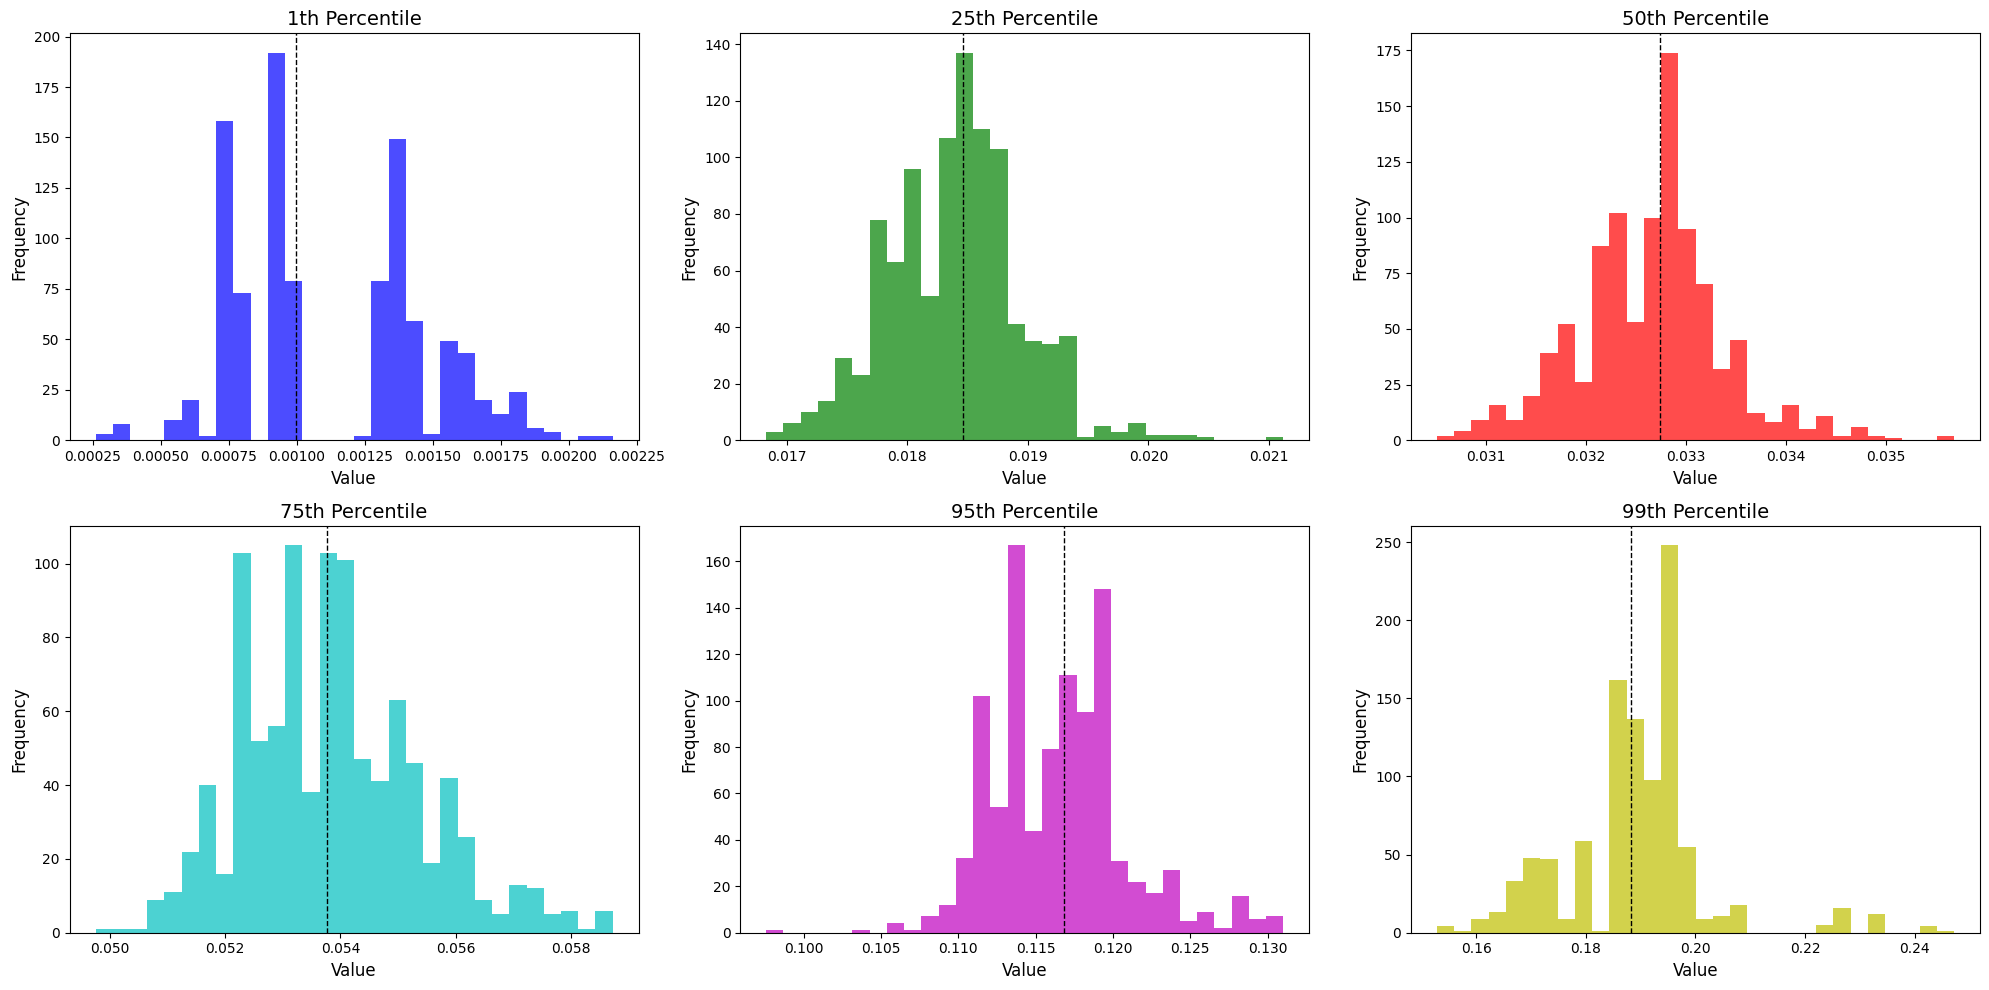

In [50]:

def plot_bootstrap_distributions(df, column, percentiles=[1, 25, 50, 75, 95, 99], confidence=0.95, n_bootstraps=1000, colors=['b', 'g', 'r', 'c', 'm', 'y']):
    # Filter the data for the specific column
    data = df[column]

    # Generate bootstrap samples and calculate percentiles for each bootstrap
    bootstrapped_percentiles = {p: [] for p in percentiles}
    for _ in range(n_bootstraps):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        for p in percentiles:
            bootstrapped_percentiles[p].append(np.percentile(bootstrap_sample, p))

    # Determine the number of rows and columns needed for the subplots
    n_cols = 3
    n_rows = (len(percentiles) + n_cols - 1) // n_cols

    # Plot the distributions of the bootstrap percentiles
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axs = axs.flatten()  # Flatten the 2D array of axes to make indexing easier

    for i, p in enumerate(percentiles):
        ax = axs[i]
        # Plot histogram of the bootstrap percentiles
        ax.hist(bootstrapped_percentiles[p], bins=30, color=colors[i % len(colors)], alpha=0.7)
        # Add a vertical line for the actual percentile value from the original data
        ax.axvline(np.percentile(data, p), color='k', linestyle='dashed', linewidth=1)
        ax.set_title(f'{p}th Percentile', fontsize=14)
        ax.set_xlabel('Value', fontsize=12)
        ax.set_ylabel('Frequency', fontsize=12)

        # Remove grid lines
        ax.grid(False)

    # Turn off unused subplots if there are any
    for i in range(len(percentiles), len(axs)):
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()


# Example usage
plot_bootstrap_distributions(df, 'ratiodurationRawSpeedRangeBetween90And100', percentiles=[1, 25, 50, 75, 95, 99])
